<img src="images/ScDo-Bandeau_Lingua_Technologies.png" style="width: 100%;float:center;"/>

<h1 style="font-size:250%;text-align:center">Prédiction de l'évolution temporelle de la</h1>
<h1 style="font-size:250%;text-align:center">pandémie du COVID-19</h1>
<h1 style="font-size:250%;text-align:center">modèles prédictifs</h1>
<h4 style="font-size:150%;text-align:center">par Claude COULOMBE</h4>
<h5 style="font-size:100%;text-align:center">PhD, scientifique de données, consultant Lingua Technologies</h5>


<img src="images/ScDo-pandas_logo.png" width=400 />

Pour contrer l'anxiété de la pandémie de COVID-19, rien de mieux que d'agir. J'ai donc préparé un petit carnet Web Python, prétexte pour un petit exercice d'exploration de données avec Pandas. Maintenant un petit carnet web IPython avec des modèles prédictifs. 

**Attention!** Je ne suis pas épidémiologiste! Il s'agit d'un exercice «amateur» réalisé comme un loisir scientifique. Je suis ouvert à la discussion pour améliorer mon modèle et pour le plaisir d'apprendre.

Commentaire publié dans l'Actualité du 30 mars 2020: https://bit.ly/3dIOvYK

### Importation des bibliothèques utilisées

In [509]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline


## Données

### Dépôt de données ouvertes du COVID-19 - John Hopkins University


https://github.com/CSSEGISandData/COVID-19

<img src="" style="width: 100%;float:center;"/>

**Note** : Les données contenues dans le répertoire DATA doivent être mise à jour régulièrement pour refléter l'évolution de la pandémie dans le temps. 


### Lecture des données

Nous nous intéressons au fichier `time_series_19-covid-Confirmed.csv` qui contient les données sur les cas confirmés de COVID-19

In [510]:
# Note - bonne pratique de postfixer les Dataframe par _df (Rappel: Python n'est pas typé)
series_chronologiques_COVID19_df = pd.read_csv('DATA/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')


In [511]:
series_chronologiques_COVID19_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,4,4,5,5,6
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,9
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


### Retrait d'attributs «superflus»

Puisque nous nous intéressons à l'évolution du nombre de malades dans le temps, certains attributs (colonnes du tableau de données) sont superflus ou «inutiles» et alourdissent notre analyse.

Ci-dessous une liste d'attributs à retirer:

In [512]:
attributs_a_retirer = ["Lat","Long"]


Retirer les attributs «superflus» avec la fonction `.drop()`

In [513]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.drop(attributs_a_retirer,axis='columns')


In [514]:
series_chronologiques_COVID19_df.head()


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


#### Maintenant, examinons les données pour les différentes provinces canadiennes.

In [515]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
35,Alberta,Canada,0,0,0,0,0,0,0,0,...,301,359,358,486,542,542,621,661,690,754
36,British Columbia,Canada,0,0,0,0,0,0,1,1,...,472,617,617,725,725,884,884,970,1013,1013
37,Grand Princess,Canada,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,0,0,0,0,0,0,0,0,...,20,21,35,36,39,64,72,96,103,127
39,New Brunswick,Canada,0,0,0,0,0,0,0,0,...,17,18,18,33,45,51,66,68,70,81
40,Newfoundland and Labrador,Canada,0,0,0,0,0,0,0,0,...,24,35,35,82,102,120,135,148,152,175
41,Nova Scotia,Canada,0,0,0,0,0,0,0,0,...,41,51,68,73,90,110,122,127,147,173
42,Ontario,Canada,0,0,0,0,1,1,1,1,...,503,588,688,858,994,1144,1355,1706,1966,2392
43,Prince Edward Island,Canada,0,0,0,0,0,0,0,0,...,3,3,5,5,9,11,11,18,21,21
44,Quebec,Canada,0,0,0,0,0,0,0,0,...,628,1013,1342,1632,2024,2498,2840,3430,4162,4611


### Création d'une entrée supplémentaire spécifique pour le Québec (avec accent aigu) 

In [516]:
quebec_df = series_chronologiques_COVID19_df[(series_chronologiques_COVID19_df['Country/Region']=="Canada") & 
                                (series_chronologiques_COVID19_df['Province/State']=="Quebec")]

quebec_df.loc[44,'Country/Region'] = 'Québec'
quebec_df.loc[44,'Province/State'] = np.nan

series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.append(quebec_df , ignore_index=True)
series_chronologiques_COVID19_df


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,NaN,MS Zaandam,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,9
253,NaN,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
254,NaN,Burundi,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
255,NaN,Sierra Leone,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


### Regroupement des données des états et provinces
**Note** : Pour avoir un total par pays, nous allons regrouper les états et les provinces d'un même pays. Utilisaton des fonctions `.groupby()` et `.sum()`. Aussi `.reset_index()`

In [517]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.groupby(['Country/Region']).sum().reset_index()


Vérifions que le regroupement est bien effectué, avec les données sur le Canada.

In [518]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
32,Canada,0,0,0,0,1,1,2,2,2,...,2088,2790,3251,4042,4682,5576,6280,7398,8527,9560


In [519]:
series = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]
series


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
136,Québec,0,0,0,0,0,0,0,0,0,...,628,1013,1342,1632,2024,2498,2840,3430,4162,4611


# Modèles prédictifs



## L'évolution de l'épidémie au Québec
Pour des raisons évidente d'intérêt, je me concentrerai sur la prévision de l'évolution de l'épidémie au Québec

Rappel de la série chonologique 

In [520]:
print(list(series))


['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20']


In [521]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%y')

series_raw = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=='Québec']
print(series_raw)
dates_list = [parser(x) for x in list(series_raw.columns[1:])]
values_list = list((series_raw.values)[0][1:])
# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# lignes commentées
# values_list += [4611]
# dates_list += [parser('4/1/20')]                     
print("-"*90)
print("values_list[-10:]:")
print(list(values_list[-10:]))
print("*"*90)
print("dates_list[-10:]:")
print(dates_list[-10:])
print("-"*90)
series = pd.Series(values_list,index=dates_list)
series.index.name = 'date'
print("series[-10:]:")
print(list(series)[-10:])
print("-"*90)
print("series.index[-10:]:")
print(list(series.index)[-10:])
print("*"*90)


    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
136         Québec        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  3/23/20  3/24/20  3/25/20  3/26/20  \
136        0        0        0  ...      628     1013     1342     1632   

     3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  
136     2024     2498     2840     3430     4162    4611  

[1 rows x 72 columns]
------------------------------------------------------------------------------------------
values_list[-10:]:
[628, 1013, 1342, 1632, 2024, 2498, 2840, 3430, 4162, 4611]
******************************************************************************************
dates_list[-10:]:
[datetime.datetime(2020, 3, 23, 0, 0), datetime.datetime(2020, 3, 24, 0, 0), datetime.datetime(2020, 3, 25, 0, 0), datetime.datetime(2020, 3, 26, 0, 0), datetime.datetime(2020, 3, 27, 0, 0), datetime.datetime(2020, 3, 28, 0, 0), datetime.datetime(2020, 3, 29, 0, 0), datetime.

### Affichage de la progression temporelle du nombre de malades confirmés

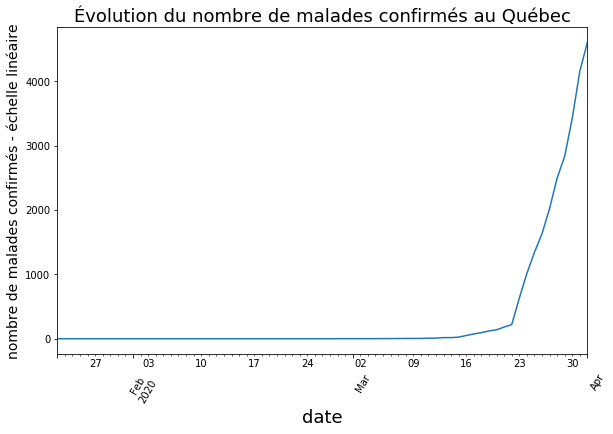

In [522]:
nombre_dor = 1.618
hauteur = 12
longueur = int(nombre_dor * hauteur)

plt.figure(figsize=(longueur/2,hauteur/2))
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle linéaire",fontsize=14)
xticks(rotation=60)
plt.show()


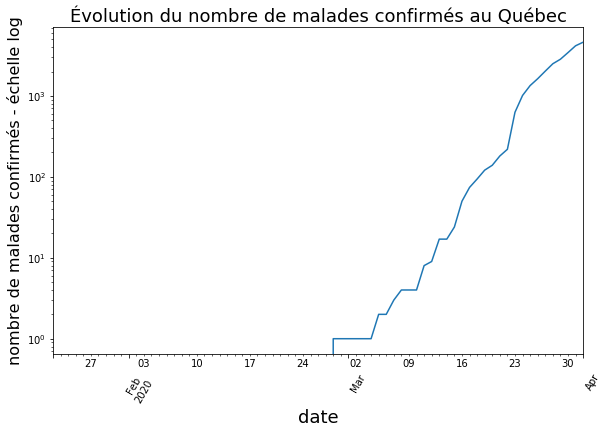

In [523]:
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
xticks(rotation=60)
ax.set_yscale('log')
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle log",fontsize=16)
xticks(rotation=60)
plt.show()


 ## Modèle simple basé sur une régression et une fonction exponentielle

### Modéliser avec une fonction exponentielle de forme $a e^{bx}+c$ avec la fonction <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">`scipy.optimize.curve_fit`</a>

[   8.51291736    0.19351309 -103.40144803]


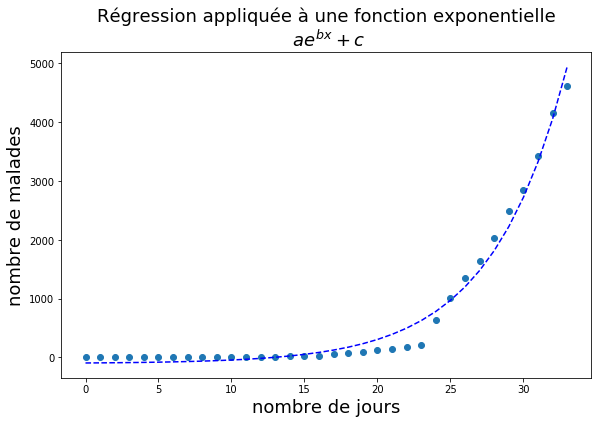

In [524]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

y_data = np.array([y for y in series.values if y > 0])
x_data = np.array([x for x in range(len(y_data))])

def func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

plt.scatter(x_data, y_data)

_ = plt.plot(x_data, func(x_data, *popt), 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()


In [525]:
def generate_xdata_predictions(x_data,n_predictions):
    longueur_x_data = len(x_data)    
    return [nouv_x for nouv_x in range(longueur_x_data,longueur_x_data+n_predictions)]
    
n_predictions = 3
x_data_list_extended = x_data.tolist() + generate_xdata_predictions(x_data,n_predictions)
x_data_extended = np.array(x_data_list_extended)
print(list(x_data_extended))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


------------------------------------------------------------------------------------------
Vraies valeurs:
x=0, y=1
x=1, y=1
x=2, y=1
x=3, y=1
x=4, y=1
x=5, y=1
x=6, y=2
x=7, y=2
x=8, y=3
x=9, y=4
x=10, y=4
x=11, y=4
x=12, y=8
x=13, y=9
x=14, y=17
x=15, y=17
x=16, y=24
x=17, y=50
x=18, y=74
x=19, y=94
x=20, y=121
x=21, y=139
x=22, y=181
x=23, y=219
x=24, y=628
x=25, y=1013
x=26, y=1342
x=27, y=1632
x=28, y=2024
x=29, y=2498
x=30, y=2840
x=31, y=3430
x=32, y=4162
x=33, y=4611
------------------------------------------------------------------------------------------


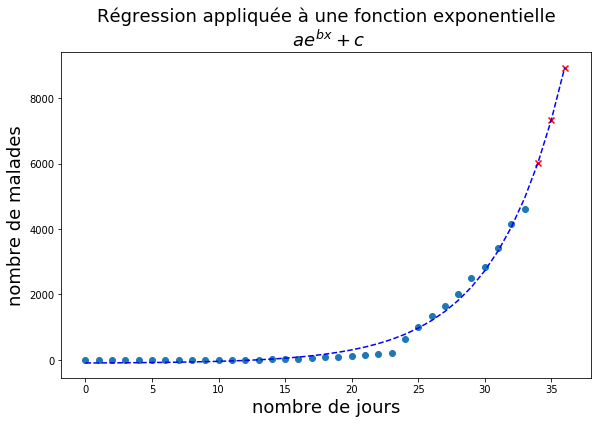

------------------------------------------------------------------------------------------
Prédictions:
x=34, y=6027
x=35, y=7335
x=36, y=8924
------------------------------------------------------------------------------------------


In [526]:
plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

predictions = func(x_data_extended, *popt)

plt.scatter(x_data, y_data)

print("-"*90)
print("Vraies valeurs:")
for index in range(len(y_data)):
    print('x=%i, y=%i' % (index,y_data[index]))
print("-"*90)

plt.scatter(x_data_extended[-n_predictions:], predictions[-n_predictions:],marker="x",color="r")

_ = plt.plot(x_data_extended, predictions, 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()

print("-"*90)
print("Prédictions:")
for index in range(len(x_data),len(x_data_extended)):
    print('x=%i, y=%i' % (index,predictions[index]))
print("-"*90)


In [527]:
prediction_regNonLin_exp = int(predictions[len(x_data)])
prediction_regNonLin_exp


6027

## Modèle ARIMA

Une méthode statistique populaire pour la prévision des séries chronologiques est le modèle ARIMA, un acronyme qui signifie AutoRegressive Integrated Moving Average, en français modèle de moyenne mobile autorégressive. Il s'agit d'une classe de modèle qui capture une suite de différentes structures temporelles dans les données d'une série chronologique. 

Trois hyperparamètres contrôlent l'algorithme ARIMA 

* p: l'ordre du modèle autorégressif (correspond au nombre de périodes antérieuses considérées)
* d: le degré de différenciation des observations brutes (soustraction d'une observation au temps t à une observation à la période de temps précédente t-1) afin de rendre la série chronologique stationnaire
* q: l'ordre de la moyenne mobile (dépendance entre une observation et l'erreur résiduelle d'une moyenne mobile apppliquée aux observations antérieures) 

Inspiration : 

* https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


### Autocorrélation
Nous pouvons calculer la corrélation pour les observations de séries chronologiques avec des observations avec des périodes de temps précédentes, appelés périodes antérieures (en anglais, lag). Étant donné que la corrélation des observations de la série chronologique est calculée avec des valeurs de la même série à des périodes antérieures, cela s'appelle une autocorrélation, (en anglais. Autocorrelation Function, ACF).

Ci-dessous, calcul et affichage de l'autocorrélation avec la fonction `.autocorrelation_plot()` de la bibliothèque Pandas.

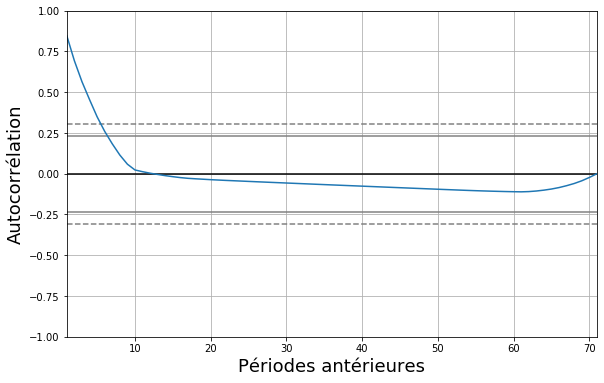

In [528]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(longueur/2,hauteur/2))
autocorrelation_plot(series)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


Le même calcul et affichage de l'autocorrélation avec la fonction `.plot_acf()` de la bibliothèque statsmodels.

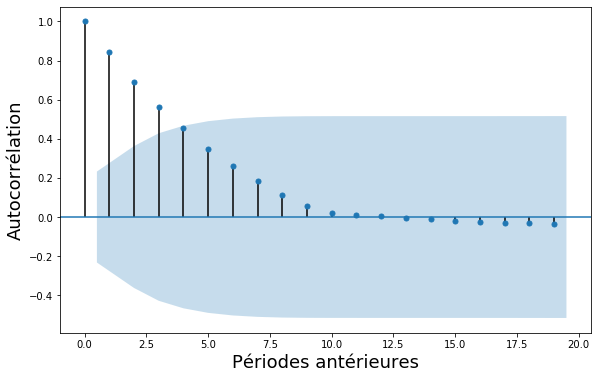

In [529]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_acf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


### Autocorrélation partielle
Une autocorrélation partielle (en anglais. Partial Autocorrelation Function, PACF) est un résumé de la relation entre une observation dans une série chronologique avec des observations à des périodes antérieures en supprimant les relations des observations intermédiaires. Utilisation de avec la fonction `.plot_pacf()` de la bibliothèque statsmodels.

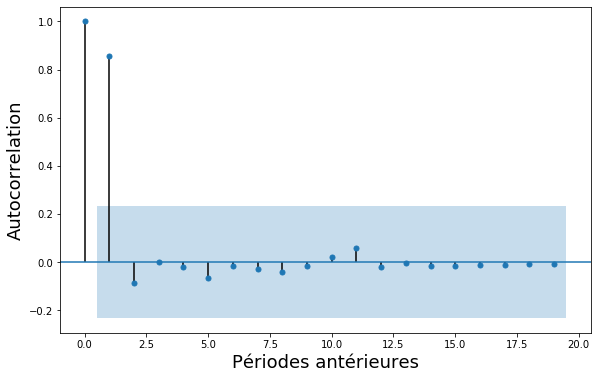

In [530]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_pacf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrelation',fontsize=18)
plt.show()


### Auto ARIMA

Auto ARIMA calcule les meilleurs modèles ARIMA à partir des données et de contraintes sur les hyperparamètres (p,d,q) de ARIMA selon diférents critères comme le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC) 

Installer la bibliothèque Python auto_arima

    > sudo pip3 install pyramid-arima

Documentation: https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#tips-and-tricks

Prise en main rapide: https://alkaline-ml.com/pmdarima/0.9.0/quickstart.html


In [531]:
import pyramid as pm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Entraîner auto-ARIMA
meilleurs_ARIMA = pm.auto_arima(series, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=100,
                             start_P=0, seasonal=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # pas de message d'erreur sur 
                             suppress_warnings=True, # pas de message de non convergence
                             stepwise=True)  # calcul pas à pas
meilleurs_ARIMA.summary()


Fit ARIMA: order=(1, 1, 1); AIC=799.271, BIC=808.265, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 0); AIC=913.136, BIC=917.633, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=799.638, BIC=806.383, Fit time=0.099 seconds
Fit ARIMA: order=(0, 1, 1); AIC=850.346, BIC=857.092, Fit time=0.099 seconds
Fit ARIMA: order=(2, 1, 1); AIC=801.799, BIC=813.041, Fit time=0.194 seconds
Fit ARIMA: order=(1, 1, 2); AIC=797.875, BIC=809.118, Fit time=0.173 seconds
Fit ARIMA: order=(2, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2); AIC=817.530, BIC=826.524, Fit time=0.152 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.944 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   70
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -393.938
Method:                       css-mle   S.D. of innovations             66.066
Date:                Thu, 02 Apr 2020   AIC                            797.875
Time:                        00:24:04   BIC                            809.118
Sample:                             1   HQIC                           802.341
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.0794    168.476      0.968      0.333    -167.127     493.286
ar.L1.D.y      0.9784      0.026     38.247      0.000       0.928       1.029
ma.L1.D.y     -0.0560      0.138     -0.404      0.686      -0.327       0.215
ma.L2.D.y     -0.2881      0.127     -2.262      0.024      -0.538      -0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0220           +0.0000j            1.0220            0.0000
MA.1            1.7684           +0.0000j            1.7684            0.0000
MA.2           -1.9626           +0.0000j            1.9626            0.5000
-----------------------------------------------------------------------------
"""

### Entraînement des deux meilleurs modèles ARIMA

Le critère de sélection selon le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC).

Certains modèles ARIMA sont retirés car ils ne convergent pas (`LinAlgError: SVD did not converge`)

In [532]:
meilleurs_ARIMA = [(1,1,0) ]

Taille du jeu de données de test= 12
******************************************************************************************
Modèle ARIMA: (1, 1, 0)
Nombre de jours écoulés=22, t=0, prédiction=154, vraie valeur=181
Nombre de jours écoulés=23, t=1, prédiction=219, vraie valeur=219
Nombre de jours écoulés=24, t=2, prédiction=253, vraie valeur=628
Nombre de jours écoulés=25, t=3, prédiction=940, vraie valeur=1013
Nombre de jours écoulés=26, t=4, prédiction=1350, vraie valeur=1342
Nombre de jours écoulés=27, t=5, prédiction=1630, vraie valeur=1632
Nombre de jours écoulés=28, t=6, prédiction=1888, vraie valeur=2024
Nombre de jours écoulés=29, t=7, prédiction=2384, vraie valeur=2498
Nombre de jours écoulés=30, t=8, prédiction=2947, vraie valeur=2840


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


Nombre de jours écoulés=31, t=9, prédiction=3156, vraie valeur=3430
Nombre de jours écoulés=32, t=10, prédiction=3990, vraie valeur=4162
Nombre de jours écoulés=33, t=11, prédiction=4872, vraie valeur=4611
meilleur_ARIMA (1, 1, 0)
Nombre de jours écoulés=34, t=12, prédiction=5027
meilleur_ARIMA (1, 1, 0)
Nombre de jours écoulés=35, t=13, prédiction=5415
meilleur_ARIMA (1, 1, 0)
Nombre de jours écoulés=36, t=14, prédiction=5778
Test RMSE: 173.572


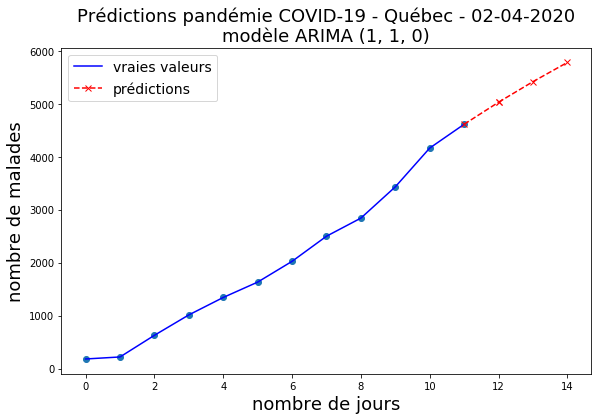

******************************************************************************************


In [533]:
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
from math import sqrt

X = series.values
X = [x for x in X if x > 0]

# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# X += [3430]
taille_entrainement_data = int(len(X) * 0.66)
print("Taille du jeu de données de test=",len(X)-taille_entrainement_data)

# Séparation entre jeu de données d'entraînement et jeu de données de test
entrainement_data, test_data = X[0:taille_entrainement_data], X[taille_entrainement_data:len(X)]

predictions_ARIMA = {}
print("*"*90)

for meilleur_ARIMA in meilleurs_ARIMA:
    print("Modèle ARIMA:",meilleur_ARIMA)
    historique = [x for x in entrainement_data]
    predictions = list()
    nbr_predictions = 3
    nbr_jours_init = len(X)-len(test_data)

    for t in range(len(test_data)+nbr_predictions):
        modele_ARIMA = ARIMA(historique, order=meilleur_ARIMA)
        modele_ARIMA_entraine = modele_ARIMA.fit(disp=0)
        sortie = modele_ARIMA_entraine.forecast()
        une_prediction = sortie[0]
        predictions.append(une_prediction)
        if t < len(test_data):
            vraie_valeur = test_data[t]
            historique.append(vraie_valeur)
            print('Nombre de jours écoulés=%i, t=%i, prédiction=%i, vraie valeur=%i' % (nbr_jours_init+t,t,une_prediction,vraie_valeur))
        else:
            historique.append(une_prediction)
            print("meilleur_ARIMA",meilleur_ARIMA)
            etiq_ARIMA = "_".join([str(hyperparam) for hyperparam in meilleur_ARIMA])
            if not etiq_ARIMA in predictions_ARIMA.keys():
                predictions_ARIMA[etiq_ARIMA]=int(une_prediction)
            print('Nombre de jours écoulés=%i, t=%i, prédiction=%i' % (nbr_jours_init+t,t,une_prediction))

    # Évaluation de l'erreur de prédiction
    rmse = sqrt(mean_squared_error(test_data, predictions[:-nbr_predictions]))
    print('Test RMSE: %.3f' % rmse)
    # Afficher les vraies valeurs et les prédictions pour le jeu de données de test
    plt.figure(figsize=(longueur/2,hauteur/2))
    date = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
    plt.title(u"Prédictions pandémie COVID-19 - Québec - " + date + "\n" + 
              "modèle ARIMA (" + etiq_ARIMA.replace("_",", ") + ")",fontsize=18)
    x_data = list(range(len(test_data)))
    x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
    plt.scatter(x_data,test_data)
    plt.plot(test_data,color='blue',label="vraies valeurs")
    plt.plot(x_data_extension[-nbr_predictions:],
             predictions[-nbr_predictions:],
             "r--",marker="x",label="prédictions")
    point1 = [x_data[-1], test_data[-1]]
    point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values,"r--",marker="x")
    plt.legend(loc='best',fontsize=14)
    plt.xlabel("nombre de jours",fontsize=18)
    plt.ylabel("nombre de malades",fontsize=18)
    plt.show()
    print("*"*90)


## Modèle combiné 

Moyenne des prédictions des meilleurs modèles ARIMA. 

Note: Avant le premier avril 2020,le modèle comportait une partie exponentielle issue d'un calcul de régression non linéaire.

Pour les prédictions du 2 avril 20202, un seul modèle ARIMA (1,1,0) a été retenu.

In [534]:
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
# total_predictions = prediction_regNonLin_exp 
total_predictions = 0 
print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
for etiq_ARIMA in predictions_ARIMA.keys():
    print("Prédictions ARIMA: (" + etiq_ARIMA.replace("_",", ") + ") : " + str(predictions_ARIMA[etiq_ARIMA]))
    total_predictions += predictions_ARIMA[etiq_ARIMA]
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
# print(" => ",int(total_predictions/(len(predictions_ARIMA)+1)))
print(" => ",int(total_predictions/len(predictions_ARIMA))," <= ")


Prédictions régr. non-lin.:  6027
Prédictions ARIMA: (1, 1, 0) : 5027
Prédictions pour 02-04-2020
 =>  5027  <= 


### Afficher les vraies valeurs et la prédiction pour demain

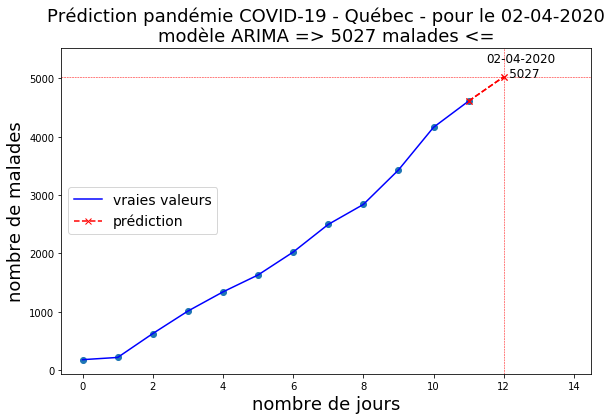

In [535]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = int(total_predictions/len(predictions_ARIMA))
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA => " + str(prediction_demain) + " malades <=",fontsize=18)
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+2.5)
ylim(top=point2[1]+500)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.savefig('images/Prediction-COVID19-Quebec.png')
plt.show()


In [536]:
print("Fin du carnet web IPython")


Fin du carnet web IPython
